In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from IPython.display import Audio
import tensorflow as tf
import keras
from keras.layers import Dense,Flatten, Dropout, Conv1D,MaxPooling1D,BatchNormalization
from keras.models import Sequential



In [ ]:
import kagglehub

path_cremad = kagglehub.dataset_download("ejlok1/cremad")

print("Path to dataset files:", path_cremad)

100%|██████████| 451M/451M [00:05<00:00, 80.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ejlok1/cremad/versions/1


In [ ]:

path_ravdess = kagglehub.dataset_download("uwrfkaggler/ravdess-emotional-speech-audio")

print("Path to dataset files:", path_ravdess)

100%|██████████| 429M/429M [00:02<00:00, 150MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1


In [ ]:
Cremad = "/root/.cache/kagglehub/datasets/ejlok1/cremad/versions/1"
Ravdess = "/root/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1"

In [ ]:
ravdess_direc_list=os.listdir(Ravdess)
file_emotion=[]
file_path=[]
for dir in ravdess_direc_list:
  actor = os.listdir(Ravdess +'/'+ dir)
  for file in actor:
    if file.endswith(".wav"):
     part = file.split('.')[0]
     part = part.split('-')

    file_emotion.append(int(part[2]))
    file_path.append(Ravdess +'/'+ dir + '/' + file)

  emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])


path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

<ipython-input-5-9dba536e79c4>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)


Emotions                                               Path
0       sad  /root/.cache/kagglehub/datasets/uwrfkaggler/ra...
1      calm  /root/.cache/kagglehub/datasets/uwrfkaggler/ra...
2       sad  /root/.cache/kagglehub/datasets/uwrfkaggler/ra...
3  surprise  /root/.cache/kagglehub/datasets/uwrfkaggler/ra...
4   disgust  /root/.cache/kagglehub/datasets/uwrfkaggler/ra...

In [ ]:
crema_directory_list = os.listdir(Cremad)

file_emotion_c = []
file_path_c = []

for dir in crema_directory_list:
  actor = os.listdir(Cremad +'/'+ dir)
  for file in actor:

   file_path_c.append(Cremad +'/'+ file)

   if file.endswith(".wav"):
    part=file.split('.')[0]
    part=part.split('_')
    if part[2] == 'SAD':
        file_emotion_c.append('sad')
    elif part[2] == 'ANG':
        file_emotion_c.append('angry')
    elif part[2] == 'DIS':
        file_emotion_c.append('disgust')
    elif part[2] == 'FEA':
        file_emotion_c.append('fear')
    elif part[2] == 'HAP':
        file_emotion_c.append('happy')
    elif part[2] == 'NEU':
        file_emotion_c.append('neutral')
    else:
        file_emotion_c.append('Unknown')

emotion_df_c = pd.DataFrame(file_emotion_c, columns=['Emotions'])

path_df_c = pd.DataFrame(file_path_c, columns=['Path'])
Crema_df = pd.concat([emotion_df_c, path_df_c], axis=1)
Crema_df.head()


Emotions                                               Path
0    happy  /root/.cache/kagglehub/datasets/ejlok1/cremad/...
1    angry  /root/.cache/kagglehub/datasets/ejlok1/cremad/...
2     fear  /root/.cache/kagglehub/datasets/ejlok1/cremad/...
3      sad  /root/.cache/kagglehub/datasets/ejlok1/cremad/...
4    happy  /root/.cache/kagglehub/datasets/ejlok1/cremad/...

In [ ]:
data_path=pd.concat([Ravdess_df,Crema_df],axis=0)
data_path.replace({1:'neutral', 2:'calm', 3:'happy',4:'sad', 5:'angry',6:'fearful', 7:'disgust', 8:'surprise'},inplace=True)
data_path.replace('versions/1Actor','versions/1/Actor',inplace=True)
data_path.head()

Emotions                                               Path
0       sad  /root/.cache/kagglehub/datasets/uwrfkaggler/ra...
1      calm  /root/.cache/kagglehub/datasets/uwrfkaggler/ra...
2       sad  /root/.cache/kagglehub/datasets/uwrfkaggler/ra...
3  surprise  /root/.cache/kagglehub/datasets/uwrfkaggler/ra...
4   disgust  /root/.cache/kagglehub/datasets/uwrfkaggler/ra...

In [ ]:
data_path.Emotions

0            sad
1           calm
2            sad
3       surprise
4        disgust
          ...   
7437     neutral
7438        fear
7439       happy
7440     disgust
7441     disgust
Name: Emotions, Length: 8906, dtype: object

In [ ]:
label=data_path['Emotions']
path=data_path['Path']
data_path.head()

Emotions                                               Path
0       sad  /root/.cache/kagglehub/datasets/uwrfkaggler/ra...
1      calm  /root/.cache/kagglehub/datasets/uwrfkaggler/ra...
2       sad  /root/.cache/kagglehub/datasets/uwrfkaggler/ra...
3  surprise  /root/.cache/kagglehub/datasets/uwrfkaggler/ra...
4   disgust  /root/.cache/kagglehub/datasets/uwrfkaggler/ra...

In [ ]:
def waveplot(data_path,sampling_rate,emotion):
  plt.title("Waveplot for {}".format(emotion))
  librosa.display.waveshow(data_path, sr=sampling_rate)
  plt.show()

In [ ]:
def spectogram(data_path,sr,emotion):
  mel_spect=librosa.stft(data_path)
  plt.title("Spectrogram for{}".format(emotion))
  mel_spect=librosa.amplitude_to_db(mel_spect,ref=np.max)
  librosa.display.specshow(mel_spect,sr=sr,x_axis='time',y_axis='mel')
  plt.show()


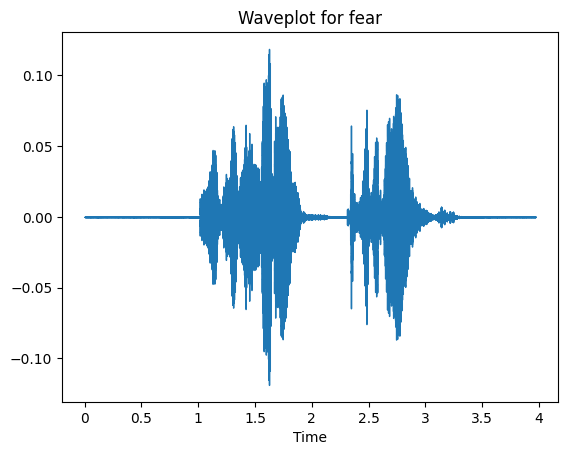

<ipython-input-11-6cb1dee788bf>:4: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  mel_spect=librosa.amplitude_to_db(mel_spect,ref=np.max)


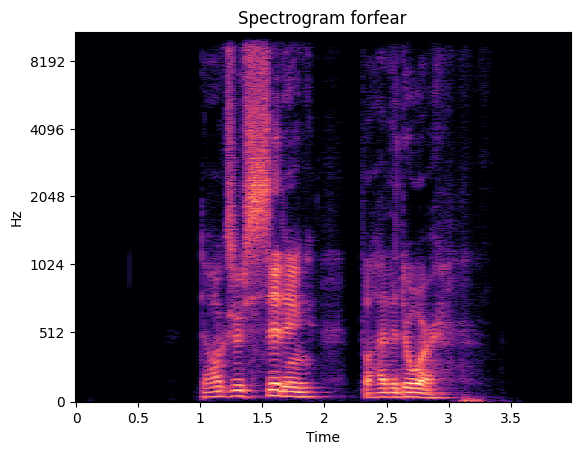

In [ ]:
emotion = 'fear'
path = np.array(data_path.Path[data_path['Emotions']==emotion])[2]
path=path.replace('versions/1Actor','versions/1/Actor')
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

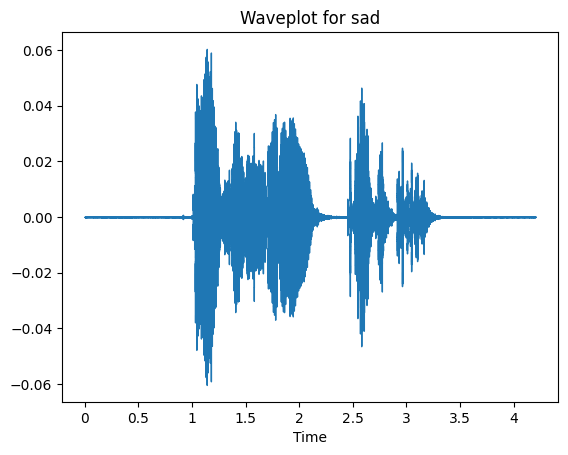

<ipython-input-11-6cb1dee788bf>:4: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  mel_spect=librosa.amplitude_to_db(mel_spect,ref=np.max)


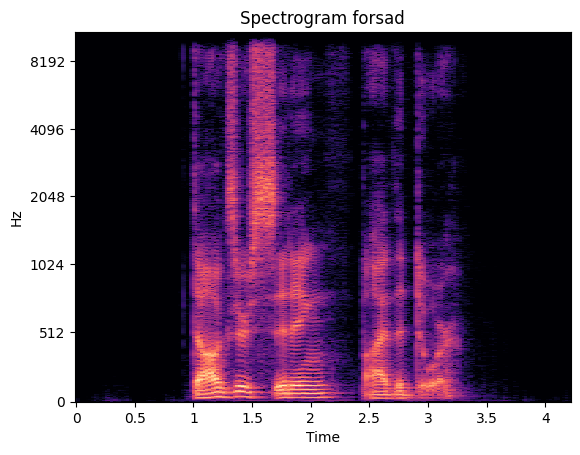

In [ ]:
emotion = 'sad'
path = np.array(data_path.Path[data_path['Emotions']==emotion])[1]
path=path.replace('versions/1Actor','versions/1/Actor')
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

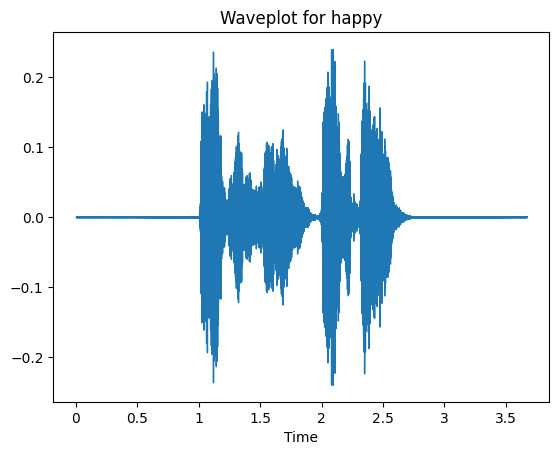

<ipython-input-11-6cb1dee788bf>:4: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  mel_spect=librosa.amplitude_to_db(mel_spect,ref=np.max)


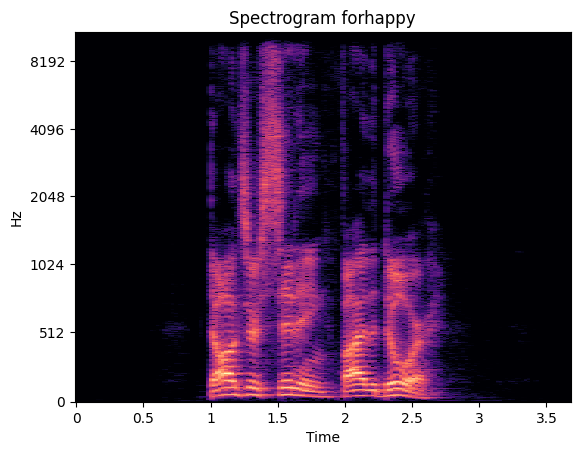

In [ ]:
emotion = 'happy'
path = np.array(data_path.Path[data_path['Emotions']==emotion])[1]
path=path.replace('versions/1Actor','versions/1/Actor')
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

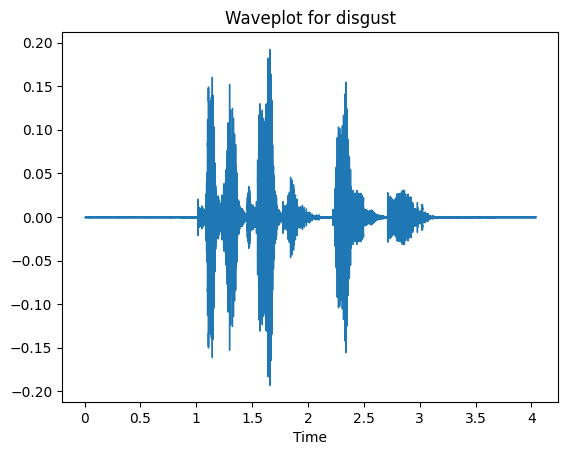

<ipython-input-11-6cb1dee788bf>:4: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  mel_spect=librosa.amplitude_to_db(mel_spect,ref=np.max)


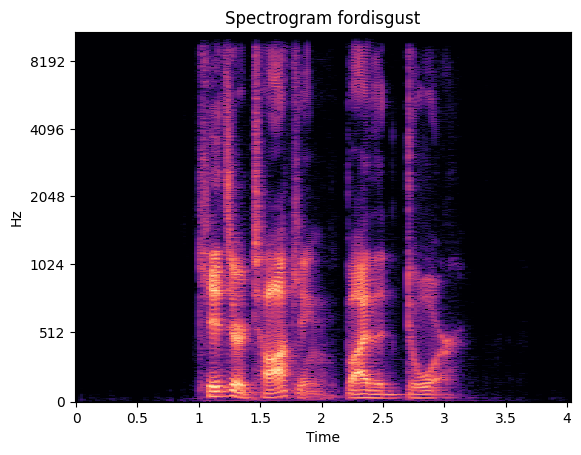

In [ ]:
emotion = 'disgust'
path = np.array(data_path.Path[data_path['Emotions']==emotion])[1]
path=path.replace('versions/1Actor','versions/1/Actor')
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

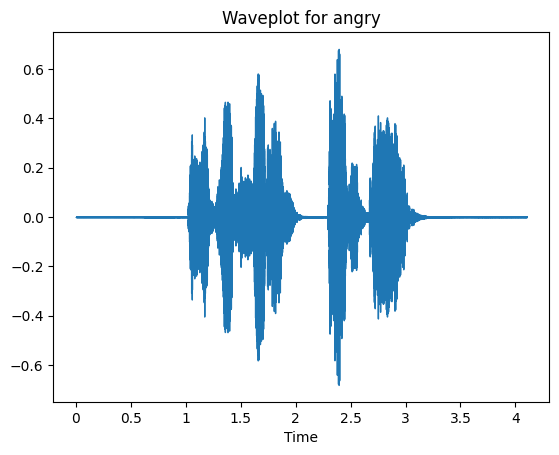

<ipython-input-11-6cb1dee788bf>:4: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  mel_spect=librosa.amplitude_to_db(mel_spect,ref=np.max)


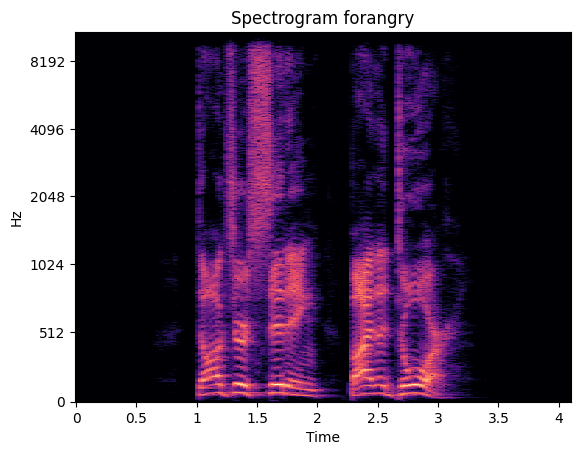

In [ ]:
emotion = 'angry'
path = np.array(data_path.Path[data_path['Emotions']==emotion])[0]
path=path.replace('versions/1Actor','versions/1/Actor')
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

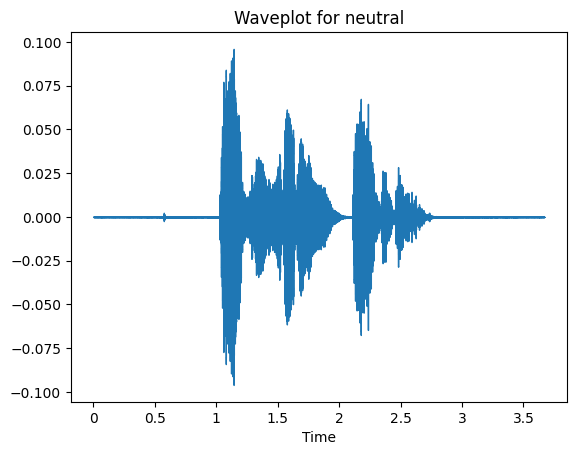

<ipython-input-11-6cb1dee788bf>:4: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  mel_spect=librosa.amplitude_to_db(mel_spect,ref=np.max)


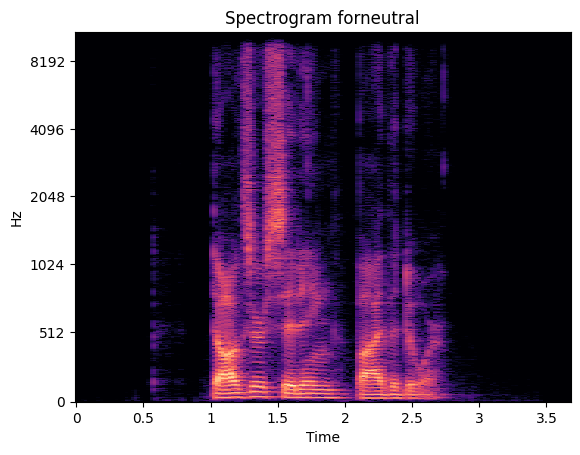

In [ ]:
emotion = 'neutral'
path = np.array(data_path.Path[data_path['Emotions']==emotion])[1]
path=path.replace('versions/1Actor','versions/1/Actor')
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [133]:
def extract_mfcc(filename):
    filename=str(filename)

    if os.path.isfile(filename):
     y, sr = librosa.load(filename, duration=3, offset=0.5)
     mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
     return mfcc
    else:
      return None



In [135]:
extract_mfcc(data_path['Path'][0].iloc[0])

array([-4.4461908e+02,  8.4276985e+01, -1.9843765e+01,  1.5883853e+01,
        1.6037123e+01, -1.3109593e+01, -2.2193991e+01, -7.4111891e+00,
       -3.1916550e+01, -7.8615351e+00,  2.5135541e+00, -2.0645359e+01,
       -5.7368941e+00, -2.8059974e+00, -1.0431404e+01, -1.9830444e+00,
       -8.5486927e+00, -3.6448941e+00, -4.4709954e-01, -7.1435647e+00,
       -1.3425426e+00, -5.9624896e+00, -4.0021257e+00, -3.1386466e+00,
       -6.4151707e+00, -2.3048835e+00, -5.1104541e+00, -1.1337537e+00,
       -4.2063384e+00,  7.4990046e-01,  1.6384320e-01, -4.7901554e+00,
       -2.1696782e+00,  6.8962884e-01, -2.3807805e+00,  3.1550212e+00,
        2.5479174e+00,  3.5157983e+00,  8.1557536e-01,  3.5893056e+00],
      dtype=float32)

In [136]:
X_mfcc = data_path['Path'].apply(lambda x: extract_mfcc(x)).dropna()

In [137]:
X_mfcc

0       [-444.61908, 84.276985, -19.843765, 15.883853,...
1       [-541.4544, 97.864, -3.2071304, 22.896542, 15....
2       [-557.4595, 87.569954, 0.64032173, 23.490332, ...
3       [-529.04895, 62.957077, -1.4373395, 9.3146, 6....
4       [-497.50046, 73.95188, -4.592461, 18.557158, 1...
                              ...                        
1459    [-658.2824, 56.52901, -1.3194304, 6.4331713, 6...
1460    [-591.577, 66.02304, -10.278738, 0.99193585, 4...
1461    [-555.59424, 57.832054, -17.399124, 1.592499, ...
1462    [-609.7858, 51.978493, -5.0955524, -0.61504084...
1463    [-438.9592, 46.956875, -20.248856, -1.8855997,...
Name: Path, Length: 1440, dtype: object

In [138]:
X= [x for x in X_mfcc if x is not None]
X=np.expand_dims(X,-1)
X.shape

(1440, 40, 1)

In [151]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(data_path[['Emotions']])
y=y.toarray()
y=np.resize(y,(1440,8))
y.shape

(1440, 8)

In [155]:
model=Sequential([Conv1D(216, kernel_size=5, activation='relu', input_shape=(40, 1)),

    MaxPooling1D(pool_size=3),
    Dropout(0.05),

    Conv1D(512, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=3),
    Dropout(0.05),

    Flatten(),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(8, activation='softmax')  ])


In [156]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [157]:
model.fit(X,y,epochs=50)

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.1501 - loss: 2.3708
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.2308 - loss: 2.0131
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.2593 - loss: 1.9755
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.3144 - loss: 1.8986
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.2840 - loss: 1.9077
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.2980 - loss: 1.8692
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.3273 - loss: 1.8323
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.3636 - loss: 1.7992
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.3582 - loss: 1.7406
Epoch 10/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.3811 - loss: 1.6984
Epoch 11/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.4395 - loss: 1.5912
Epoch 12/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy:

In [158]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [159]:
y_pred_prob=model.predict(x_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [160]:
y_pred_class=np.argmax(y_pred_prob,axis=1)
y_test_class=np.argmax(y_test,axis=1)

In [161]:
from sklearn.metrics import accuracy_score, r2_score
accuracy=accuracy_score(y_test_class,y_pred_class)
print(accuracy)

0.9166666666666666


In [165]:
report=classification_report(y_test_class,y_pred_class,output_dict=True)
print(report)

{'0': {'precision': 0.9024390243902439, 'recall': 0.925, 'f1-score': 0.9135802469135802, 'support': 40.0}, '1': {'precision': 0.9714285714285714, 'recall': 0.8095238095238095, 'f1-score': 0.8831168831168831, 'support': 42.0}, '2': {'precision': 0.9696969696969697, 'recall': 0.9142857142857143, 'f1-score': 0.9411764705882353, 'support': 35.0}, '3': {'precision': 1.0, 'recall': 0.9111111111111111, 'f1-score': 0.9534883720930233, 'support': 45.0}, '4': {'precision': 0.9761904761904762, 'recall': 0.9761904761904762, 'f1-score': 0.9761904761904762, 'support': 42.0}, '5': {'precision': 0.5714285714285714, 'recall': 1.0, 'f1-score': 0.7272727272727273, 'support': 20.0}, '6': {'precision': 0.967741935483871, 'recall': 0.9090909090909091, 'f1-score': 0.9375, 'support': 33.0}, '7': {'precision': 0.9666666666666667, 'recall': 0.9354838709677419, 'f1-score': 0.9508196721311475, 'support': 31.0}, 'accuracy': 0.9166666666666666, 'macro avg': {'precision': 0.9156990269106713, 'recall': 0.922585736396